# Benching Gaussian Naive Bayes

This is a comparison of the speed and accuracy of the fit, predict, and out of core learning methods for gaussian naive bayes between scikit-learn and pomegranate.

In [1]:
from sklearn.naive_bayes import GaussianNB
from pomegranate import *
import time
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


First lets get the data set that will be used to test the fit and predict methods for scikit-learn and pomegranate. In this case we'll generate a 5-dimensional normally distributed data set. It will contain 300,000 points for the first, second, and third multivariate gaussian distribution.

In [2]:
n_trials = 100
n, m, k, d = 1000, 1000, 1000, 5

X = numpy.concatenate(( numpy.random.randn(n, d) + 2,
                        numpy.random.randn(m, d) + 3,
                        numpy.random.randn(k, d) + 4))
y = numpy.concatenate(( numpy.zeros(n), numpy.ones(m), numpy.ones(k) + 1))

i = numpy.arange(n+m+k)
numpy.random.shuffle(i)

X = X[i]
y = y[i]

for i in range(1, n_trials):
    temp_X = numpy.concatenate(( numpy.random.randn(n, d) + 2,
                                numpy.random.randn(m, d) + 3,
                                numpy.random.randn(k, d) + 4))
    temp_y = numpy.concatenate(( numpy.zeros(n), numpy.ones(m), numpy.ones(k) + 1))

    temp_i = numpy.arange(n+m+k)
    numpy.random.shuffle(temp_i)

    X = numpy.concatenate((X, temp_X[temp_i]))
    y = numpy.concatenate((y, temp_y[temp_i]))

Now let's create our guassian naive bayes classifier for both scikit-learn and pomegranate.

In [3]:
skl = GaussianNB()
pom = NaiveBayes( MultivariateGaussianDistribution )

Now we can run our first test, benching the fitting methods for both scikit-learn and pomegranate. This is done by fitting both classifiers to the first 1,000 points in our randomly generated dataset and timing how long it takes. We then repeat this for the next 1,000 until we reach the end of the dataset.

In [4]:
skl_fit_time = 0
pom_fit_time = 0

def bench_fit( clf, X, y ):
    tic = time.time()
    clf.fit( X, y )
    return time.time() - tic

We also test the prediction times between scikit-learn and pomegranate in a similar way to the fit test. We use the same randomly generated dataset and feed it into the predict methods for both implementations of gaussian naive bayes and time how long it takes each to complete.

In [5]:
skl_predict_time = 0
pom_predict_time = 0

def bench_predict( clf, X ):
    tic = time.time()
    predictions = clf.predict( X )
    return time.time() - tic, predictions

Finally we also find the average error over all the predictions.

In [6]:
skl_wrong = list()
pom_wrong = list()

for i in range(n_trials):
    start = (m+n+k)*i
    stop = (m+n+k)*(i+1)
    
    skl_fit_time += bench_fit( skl, X[start:stop], y[start:stop] )
    pom_fit_time += bench_fit( pom, X[start:stop], y[start:stop] )
    
    foo, skl_predict = bench_predict( skl, X[start:stop] )
    skl_predict_time += foo
    bar, pom_predict = bench_predict( skl, X[start:stop] )    
    pom_predict_time += bar
    
    skl_wrong.append((y[start:stop] != skl_predict).sum())
    pom_wrong.append((y[start:stop] != pom_predict).sum())

print "scikit-learn fit time: {}s".format( skl_fit_time )
print "pomegranate fit time: {}s".format( pom_fit_time )
print
print "scikit-learn predict time: {}s".format( skl_predict_time )
print "pomegranate predict time: {}s".format( pom_predict_time )
print
print "scikit-learn average incorrect points: {} out of {}".format( float(sum(skl_wrong)) / n_trials, n+m+k )
print "pomegranate average incorrect points: {} out of {}".format( float(sum(pom_wrong)) / n_trials, n+m+k )

scikit-learn fit time: 0.55123591423s
pomegranate fit time: 0.439584493637s

scikit-learn predict time: 0.10261797905s
pomegranate predict time: 0.112411499023s

scikit-learn average incorrect points: 523.86 out of 3000
pomegranate average incorrect points: 523.86 out of 3000


Exception numpy.linalg.linalg.LinAlgError: LinAlgError('Singular matrix',) in 'pomegranate.distributions.MultivariateGaussianDistribution._from_summaries' ignored
Exception numpy.linalg.linalg.LinAlgError: LinAlgError('Singular matrix',) in 'pomegranate.distributions.MultivariateGaussianDistribution._from_summaries' ignored
Exception numpy.linalg.linalg.LinAlgError: LinAlgError('Singular matrix',) in 'pomegranate.distributions.MultivariateGaussianDistribution._from_summaries' ignored


Now we can compare scikit-learn and pomegranate out of core learning methods. For scikit-learn, this is done by simply running the method ```partial_fit```. For pomegranate this is done by running the method ```summarize``` for each dataset then running ```from_summaries``` at the end.

Benching is done by feeding in the same randomly generated dataset in 1,000 points at a time.

In [7]:
skl = GaussianNB()
pom = NaiveBayes( MultivariateGaussianDistribution )

skl_partial_time = 0
pom_partial_time = 0

for i in range(n_trials):
    start = (m+n+k)*i
    stop = (m+n+k)*(i+1)
    
    tic = time.time()
    skl.partial_fit( X[start:stop], y[start:stop], classes=[0, 1, 2] )
    skl_partial_time += time.time() - tic
    
    tic = time.time()
    pom.summarize( X[start:stop], y[start:stop] )
    pom_partial_time += time.time() - tic

tic = time.time()
pom.from_summaries()
pom_partial_time += time.time() - tic

print "scikit-learn partial fit time: {}s".format( skl_partial_time )
print "pomegranate partial fit time: {}s".format( pom_partial_time )

scikit-learn partial fit time: 0.189670085907s
pomegranate partial fit time: 0.0706443786621s


Exception numpy.linalg.linalg.LinAlgError: LinAlgError('Singular matrix',) in 'pomegranate.distributions.MultivariateGaussianDistribution._from_summaries' ignored
Exception numpy.linalg.linalg.LinAlgError: LinAlgError('Singular matrix',) in 'pomegranate.distributions.MultivariateGaussianDistribution._from_summaries' ignored
Exception numpy.linalg.linalg.LinAlgError: LinAlgError('Singular matrix',) in 'pomegranate.distributions.MultivariateGaussianDistribution._from_summaries' ignored


For our final test, we check how closely the prediction for both scikit-learn and pomegranate match the actual classes in the dataset after the partial fit. Afterall, if the results are terrible, it does not matter how fast implementation is.

In [8]:
skl_partial_predict = skl.predict( X )
pom_partial_predict = pom.predict( X )

skl_partial_wrong = (y != skl_partial_predict).sum()
pom_partial_wrong = (y != pom_partial_predict).sum()

print "scikit-learn incorrect points: {} out of {}".format( skl_partial_wrong, len( skl_partial_predict ) )
print "pomegranate incorrect points: {} out of {}".format( pom_partial_wrong, len( pom_partial_predict ) )

scikit-learn incorrect points: 52702 out of 300000
pomegranate incorrect points: 52739 out of 300000


Here is a comparison of the final results. First with a comparison the the speeds of the fit and predict methods.

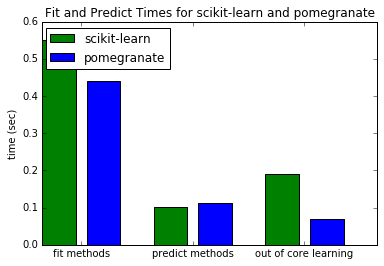

In [9]:
fig, ax = pyplot.subplots()

skl_times = ax.bar((0, 1, 2), (skl_fit_time, skl_predict_time, skl_partial_time), 0.3, color='g')
pom_times = ax.bar((0.4, 1.4, 2.4), (pom_fit_time, pom_predict_time, pom_partial_time), 0.3, color='b')

ax.set_title('Fit and Predict Times for scikit-learn and pomegranate')
ax.set_ylabel('time (sec)')
ax.set_xticks((0.35, 1.35, 2.35))
ax.set_xticklabels(('fit methods', 'predict methods', 'out of core learning'))
ax.legend((skl_times, pom_times), ('scikit-learn', 'pomegranate'), bbox_to_anchor=(0.4,1))

Then a comparison of how many incorrect labels are created with each predict method out of a total of 30,000 samples. Note that pomegranate has a slightly higher accuracy since it trains the full covariance matrix while scikit-learn only trains the diagonal.

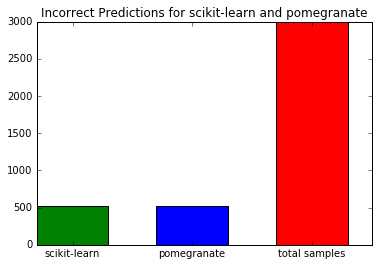

In [10]:
fig, ax = pyplot.subplots()

skl_correct = ax.bar((0), (float(sum(skl_wrong))/n_trials), 0.3, color='g')
pom_correct = ax.bar((0.5), (float(sum(pom_wrong))/n_trials), 0.3, color='b')
totals = ax.bar((1), (m+n+k), 0.3, color='r')

ax.set_title('Incorrect Predictions for scikit-learn and pomegranate')
ax.set_xticks((0.15, 0.65, 1.15))
ax.set_xticklabels(('scikit-learn', 'pomegranate', 'total samples'))

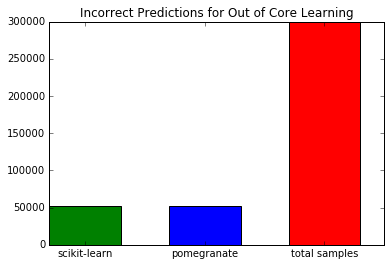

In [11]:
fig, ax = pyplot.subplots()

skl_correct = ax.bar((0), skl_partial_wrong, 0.3, color='g')
pom_correct = ax.bar((0.5), pom_partial_wrong, 0.3, color='b')
totals = ax.bar((1), (m+n+k)*n_trials, 0.3, color='r')

ax.set_title('Incorrect Predictions for Out of Core Learning')
ax.set_xticks((0.15, 0.65, 1.15))
ax.set_xticklabels(('scikit-learn', 'pomegranate', 'total samples'))

As one can see, in terms of speed pomegranate slightly edges out scikit-learn in terms of speed. Error is also comparable when doing regular fitting and out of core learning. However unlike scikit-learn, pomegranate's implementation of naive bayes makes it so that any distribution or model that can output a probability can be used as a component assuming all components have the same inputs. So for example mix and matching gaussian with uniform and exponential, or even using hidden markov models.